In [6]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score, silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

# Merge datasets
data = pd.merge(transactions, customers, on="CustomerID")

# Feature engineering
customer_features = data.groupby("CustomerID").agg(
    total_spent=("TotalValue", "sum"),
    avg_transaction_value=("TotalValue", "mean"),
    total_transactions=("TransactionID", "count"),
).reset_index()


In [7]:
# Normalize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(customer_features.drop("CustomerID", axis=1))

# Clustering with K-Means
kmeans = KMeans(n_clusters=4, random_state=42)  # Example: Using 4 clusters
customer_features["Cluster"] = kmeans.fit_predict(features_scaled)


In [8]:
# Evaluate Clustering
db_index = davies_bouldin_score(features_scaled, customer_features["Cluster"])
silhouette_avg = silhouette_score(features_scaled, customer_features["Cluster"])

# Print evaluation metrics
print(f"Davies-Bouldin Index: {db_index:.2f}")
print(f"Silhouette Score: {silhouette_avg:.2f}")

Davies-Bouldin Index: 1.06
Silhouette Score: 0.31


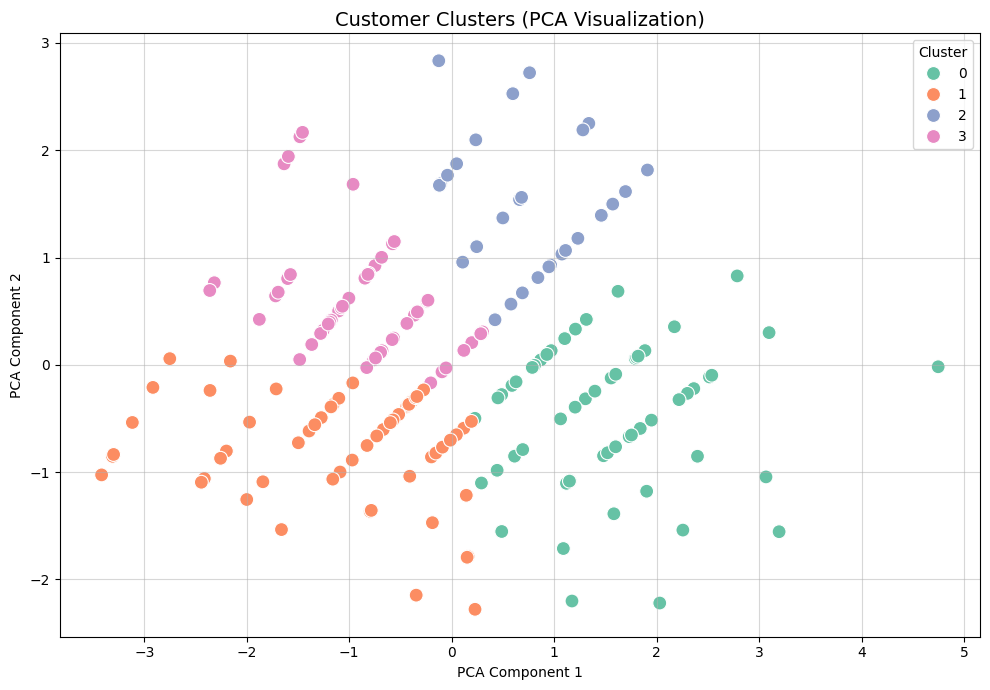

In [9]:
# Visualize Clusters
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_scaled)
customer_features["PCA1"] = pca_result[:, 0]
customer_features["PCA2"] = pca_result[:, 1]

plt.figure(figsize=(10, 7))
sns.scatterplot(
    x="PCA1", y="PCA2", hue="Cluster", data=customer_features, palette="Set2", s=100
)
plt.title("Customer Clusters (PCA Visualization)", fontsize=14)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.grid(True, alpha=0.5)
plt.tight_layout()
plt.show()
